## # Machine Learning - Time Series

These are the different steps that we need to follow to build a machine learning model for the time seris datset:
1. Data Ingestion
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Building
5. Model Evaluation

### Data Ingestion:
1. Import the required libraries such as pandas, numpy, matplotlib, seaborn etc.
2. Load the dataset by using pandas {pd.read_csv()}
3. Load the time series data into a pandas dataframe.
4. Set the datetime column as the index of the dataframe.
5. Check the datatype of the index and convert it to date-time if necessary.

Why we are converting the date column as index?

1. Retriving the data become easier.
2. Visualization becomes simple.
3. Scipy stats model need date as index.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("TSLA.CSV")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
df = df[["Date", "Close"]]

In [5]:
df.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [8]:
df.iloc[:,0] = pd.to_datetime(df["Date"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
df.set_index("Date", inplace = True)

In [12]:
df.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


### Exploratory Data Analysis - Time Series Dataset

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

In [13]:
df.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


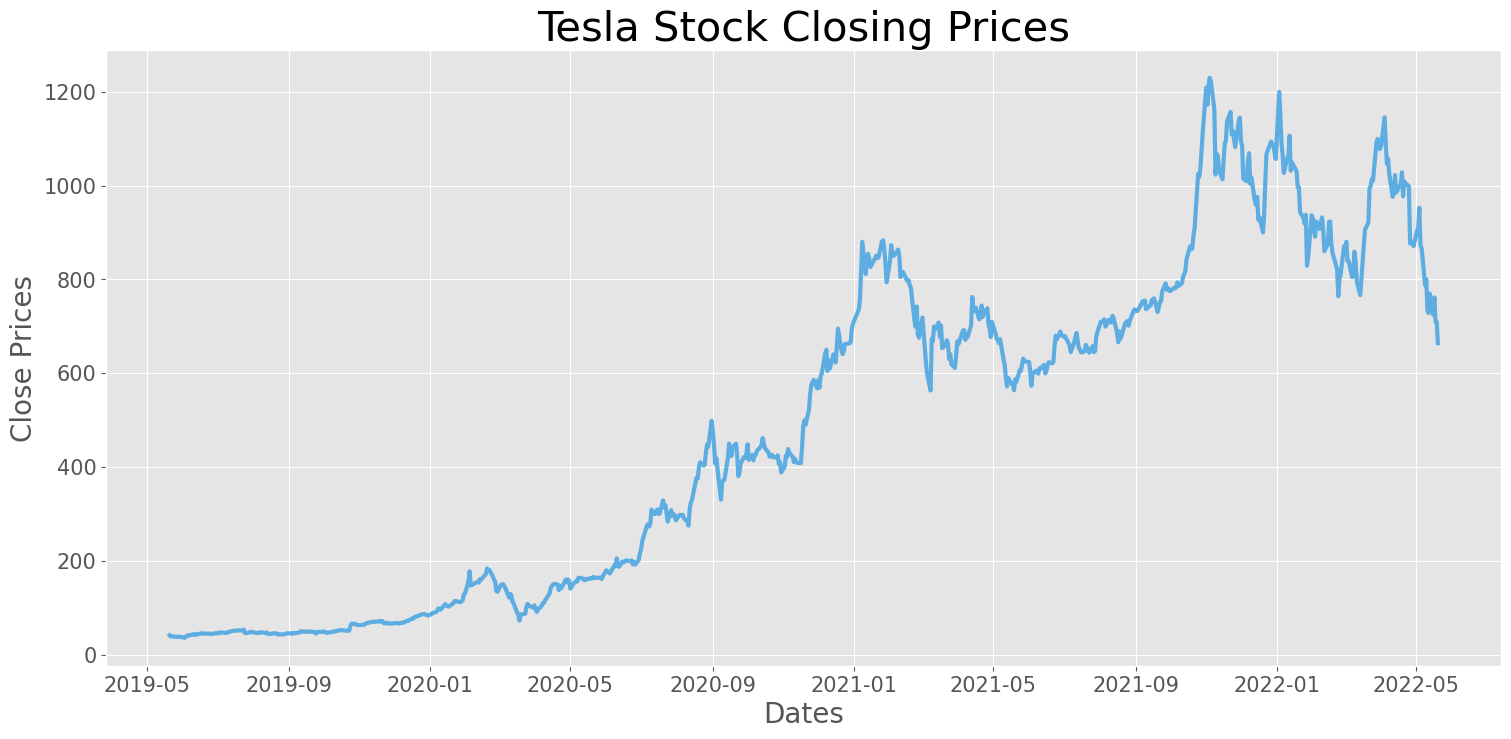

In [56]:
plt.style.use("ggplot")
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.plot(df["Close"], linewidth = 3, color = "#5DADE2")
plt.xlabel("Dates", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Close Prices", fontsize = 20)
plt.yticks(fontsize = 15)
plt.title("Tesla Stock Closing Prices", fontsize = 30)
plt.show()

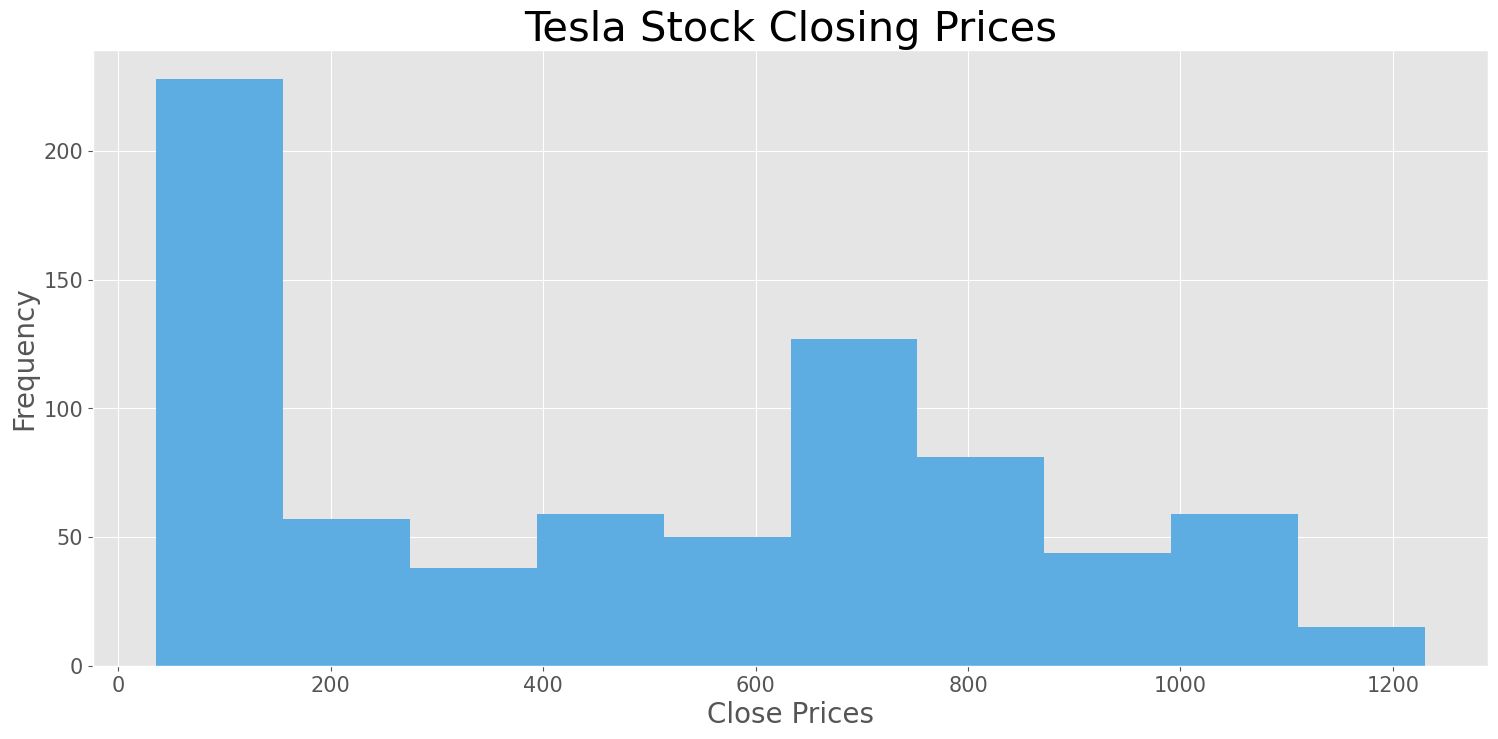

In [54]:
plt.style.use("ggplot")
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.hist(df["Close"], color = "#5DADE2")
plt.xlabel("Close Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Frequency", fontsize = 20)
plt.yticks(fontsize = 15)
plt.title("Tesla Stock Closing Prices", fontsize = 30)
plt.show()

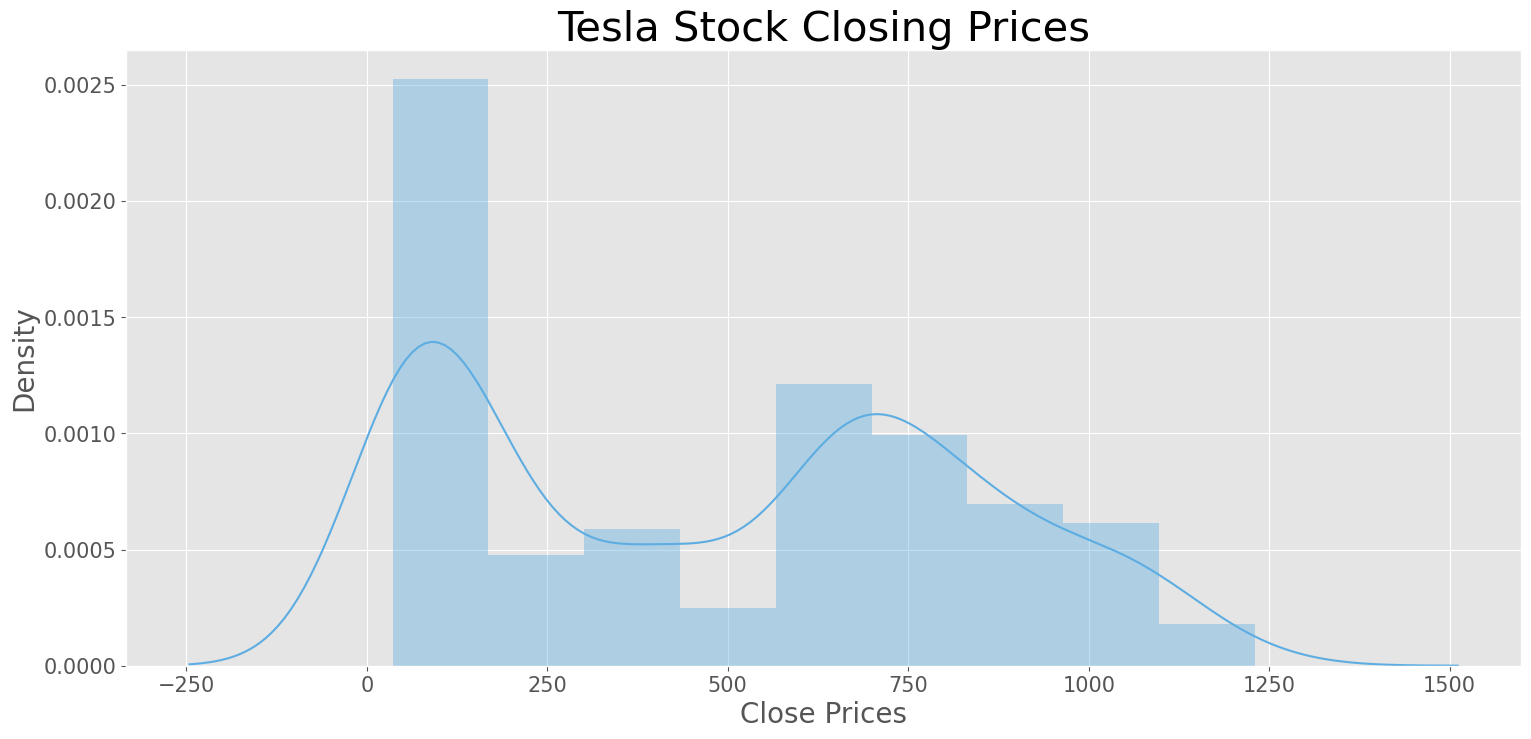

In [75]:
plt.style.use("ggplot")
plt.figure(figsize = (18, 8))
plt.grid(True)
sns.distplot(df["Close"], kde = True, color = "#5DADE2")
plt.xlabel("Close Prices", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Density", fontsize = 20)
plt.yticks(fontsize = 15)
plt.title("Tesla Stock Closing Prices", fontsize = 30)
plt.show()

In [33]:
rolling_mean = df["Close"].rolling(48).mean()
rolling_std = df["Close"].rolling(48).std()

In [34]:
rolling_mean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    936.968953
2022-05-17    934.940620
2022-05-18    932.263746
2022-05-19    930.473537
2022-05-20    928.338746
Name: Close, Length: 758, dtype: float64

In [35]:
rolling_std

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    113.126351
2022-05-17    115.404496
2022-05-18    119.124084
2022-05-19    121.840134
2022-05-20    125.615809
Name: Close, Length: 758, dtype: float64

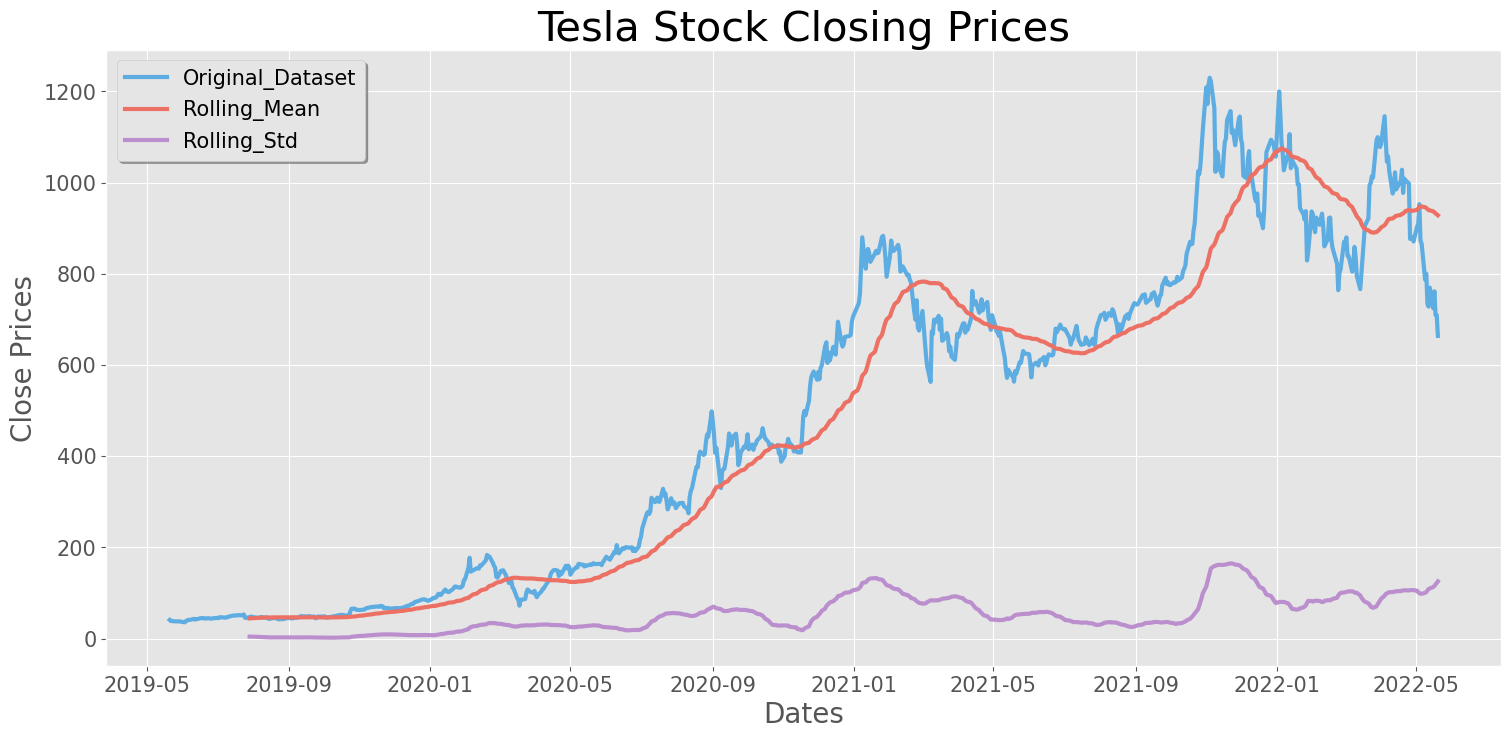

In [97]:
plt.style.use("ggplot")
plt.figure(figsize = (18, 8))
plt.grid(True)
plt.plot(df["Close"], linewidth = 3, color = "#5DADE2")
plt.plot(rolling_mean, linewidth = 3, color = "#EC7063")
plt.plot(rolling_std, linewidth = 3, color = "#BB8FCE")
plt.xlabel("Dates", fontsize = 20)
plt.xticks(fontsize = 15)
plt.ylabel("Close Prices", fontsize = 20)
plt.yticks(fontsize = 15)
plt.legend(["Original_Dataset", "Rolling_Mean", "Rolling_Std"], fontsize = 15, shadow = True)
plt.title("Tesla Stock Closing Prices", fontsize = 30)
plt.show()

### ADF - Augmented Dickey-Fuller Test

In [60]:
from statsmodels.tsa.stattools import adfuller

In [63]:
adf_test = adfuller(df["Close"])

In [64]:
adf_test

(-1.36300858170375,
 0.5998762543050691,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [66]:
adf_test = pd.Series(adf_test[0:4], index = ["Test Statistics", "p-value", "No. of lags used", "No. of observations used"])

In [67]:
adf_test["p-value"]

0.5998762543050691

In [69]:
if adf_test["p-value"] >= 0.05:
    print("Accept the Null Hypothesis, i.e. Non-Stationary Data")
else:
    print("Reject the Null Hypothesis, i.e. Stationary Data")

Accept the Null Hypothesis, i.e. Non-Stationary Data


In [86]:
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='#5DADE2',label='Original', linewidth = 3)
    plt.plot(rolling_mean, color='#EC7063', label='Rolling_Mean',linewidth = 3)
    plt.plot(rolling_std, color='#BB8FCE', label = 'Rolling_Std',linewidth = 3)
    plt.legend(loc='best', fontsize = 15, shadow=True,edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of Augmented Dickey-Fuller Test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

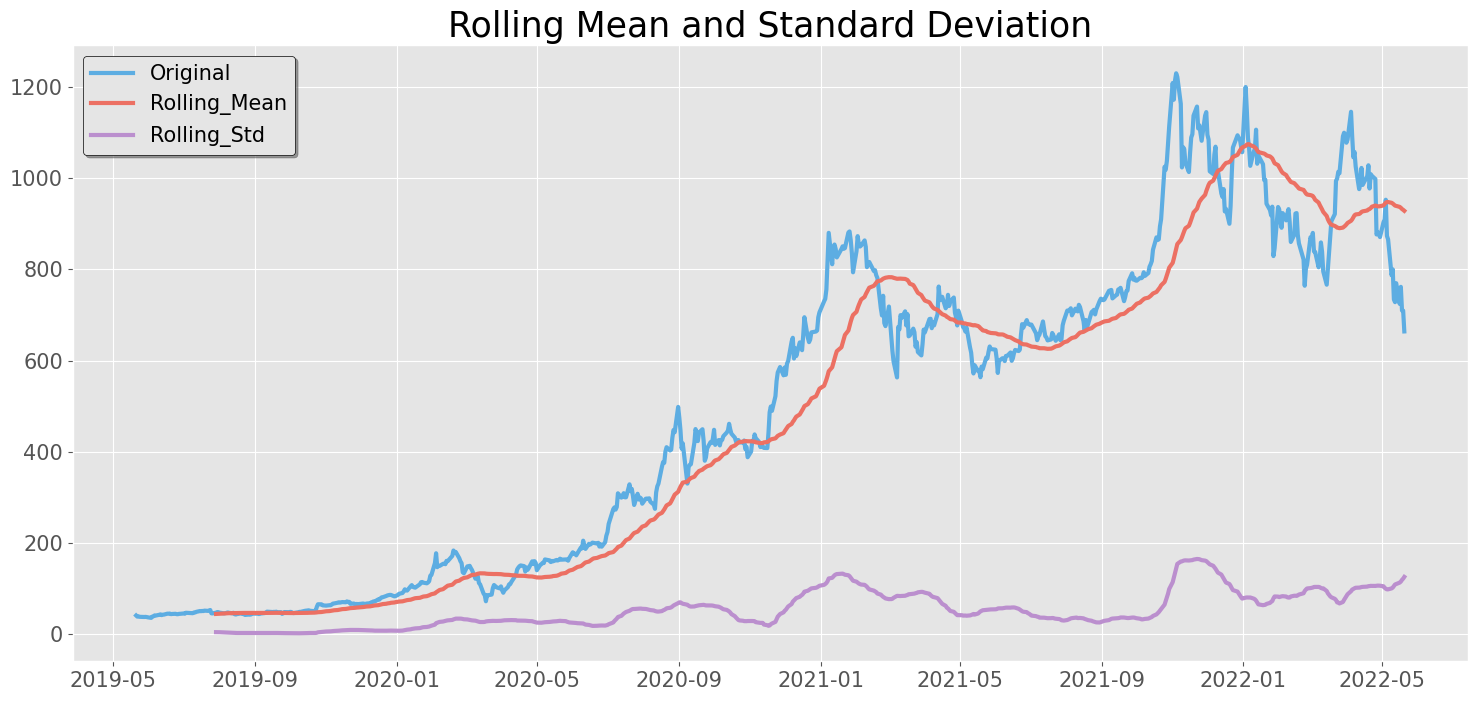

Results of Augmented Dickey-Fuller Test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [98]:
test_stationarity(df)

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [114]:
result_01 = seasonal_decompose(df[["Close"]], period = 12, model = "additive")
result_02 = seasonal_decompose(df[["Close"]], period = 12, model = "multiplicative")

In [115]:
result_01.seasonal

Date
2019-05-21   -2.346452
2019-05-22    3.768884
2019-05-23   -0.777006
2019-05-24   -0.654226
2019-05-28   -2.737845
                ...   
2022-05-16    2.149519
2022-05-17    1.323680
2022-05-18    1.837638
2022-05-19   -2.346452
2022-05-20    3.768884
Name: seasonal, Length: 758, dtype: float64

<Figure size 2000x1000 with 0 Axes>

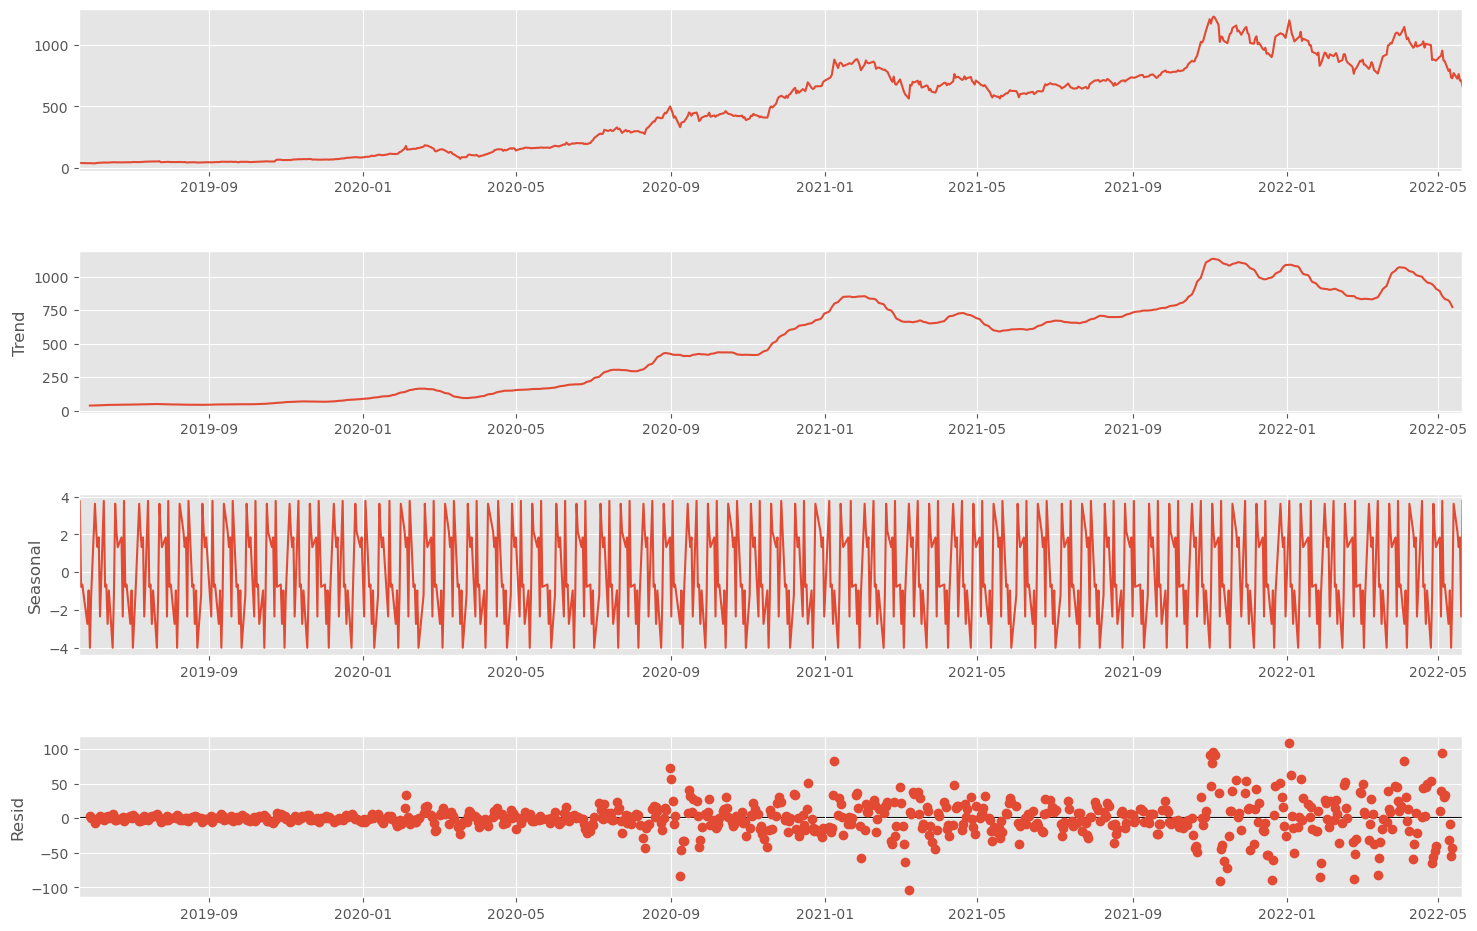

In [116]:
fig = plt.figure(figsize=(20,10))
fig = result_01.plot()
fig.set_size_inches(17,10)

In [ ]:
fig = plt.figure(figsize=(20,10))
fig = result_02.plot()
fig.set_size_inches(17,10)